# Import Libraries

In [626]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

# Load Dataset

In [627]:
df = pd.read_csv('/kaggle/input/climate-change-impact-on-agriculture-2024/climate_change_impact_on_agriculture_2024.csv')
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


# EDA

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

**Consists of:**
* 14 columns
* 10000 rows
* 9 columns are float data type, 2 columns are int data type, and 4 columns are object data type. This means there are 11 columns of numeric type and 4 columns of categoricalal type

In [629]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2007.088700,10.084245,1990.00,1999.0000,2007.000,2016.0000,2024.00
Average_Temperature_C,10000.0,15.241299,11.466955,-4.99,5.4300,15.175,25.3400,35.00
Total_Precipitation_mm,10000.0,1611.663834,805.016815,200.15,925.6975,1611.160,2306.9975,2999.67
CO2_Emissions_MT,10000.0,15.246608,8.589423,0.50,7.7600,15.200,22.8200,30.00
Crop_Yield_MT_per_HA,10000.0,2.240017,0.998342,0.45,1.4490,2.170,2.9300,5.00
Extreme_Weather_Events,10000.0,4.980900,3.165808,0.00,2.0000,5.000,8.0000,10.00
Irrigation_Access_%,10000.0,55.248332,25.988305,10.01,32.6775,55.175,77.5825,99.99
Pesticide_Use_KG_per_HA,10000.0,24.955735,14.490962,0.00,12.5275,24.930,37.4700,49.99
Fertilizer_Use_KG_per_HA,10000.0,49.973708,28.711027,0.01,25.3900,49.635,74.8250,99.99
Soil_Health_Index,10000.0,64.901278,20.195882,30.00,47.2350,64.650,82.4725,100.00


In [630]:
df.duplicated().sum()

0

In [631]:
#Display the unique values of each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

tot_len= 0
for i in df.columns:
    if i not in numeric_columns:
        print(f'\033[31m{i.upper()}\033[0m'.center(50, ' '))
        print(df[i].value_counts())
        tot_len= tot_len+ df[i].nunique()
        print()
        print()

                 COUNTRY                 
Country
USA          1032
Australia    1032
China        1031
Nigeria      1029
India        1025
Canada        984
Argentina     984
France        978
Russia        961
Brazil        944
Name: count, dtype: int64


                 REGION                  
Region
South                         754
Northeast                     752
North                         524
Central                       466
Punjab                        288
Victoria                      283
New South Wales               276
East                          273
South West                    270
Ontario                       269
West Bengal                   267
North West                    264
Volga                         261
South East                    260
West                          257
Grand Est                     254
Queensland                    253
Midwest                       253
Nouvelle-Aquitaine            252
Patagonia                     249
Tamil Nadu   

In [632]:
# Set my custom color palette for the entire noteboook
sns.set_palette(sns.color_palette(["#548bd4","#f9613b","#53a65b","#ffcc00","#fecfe7","#48909f"]))

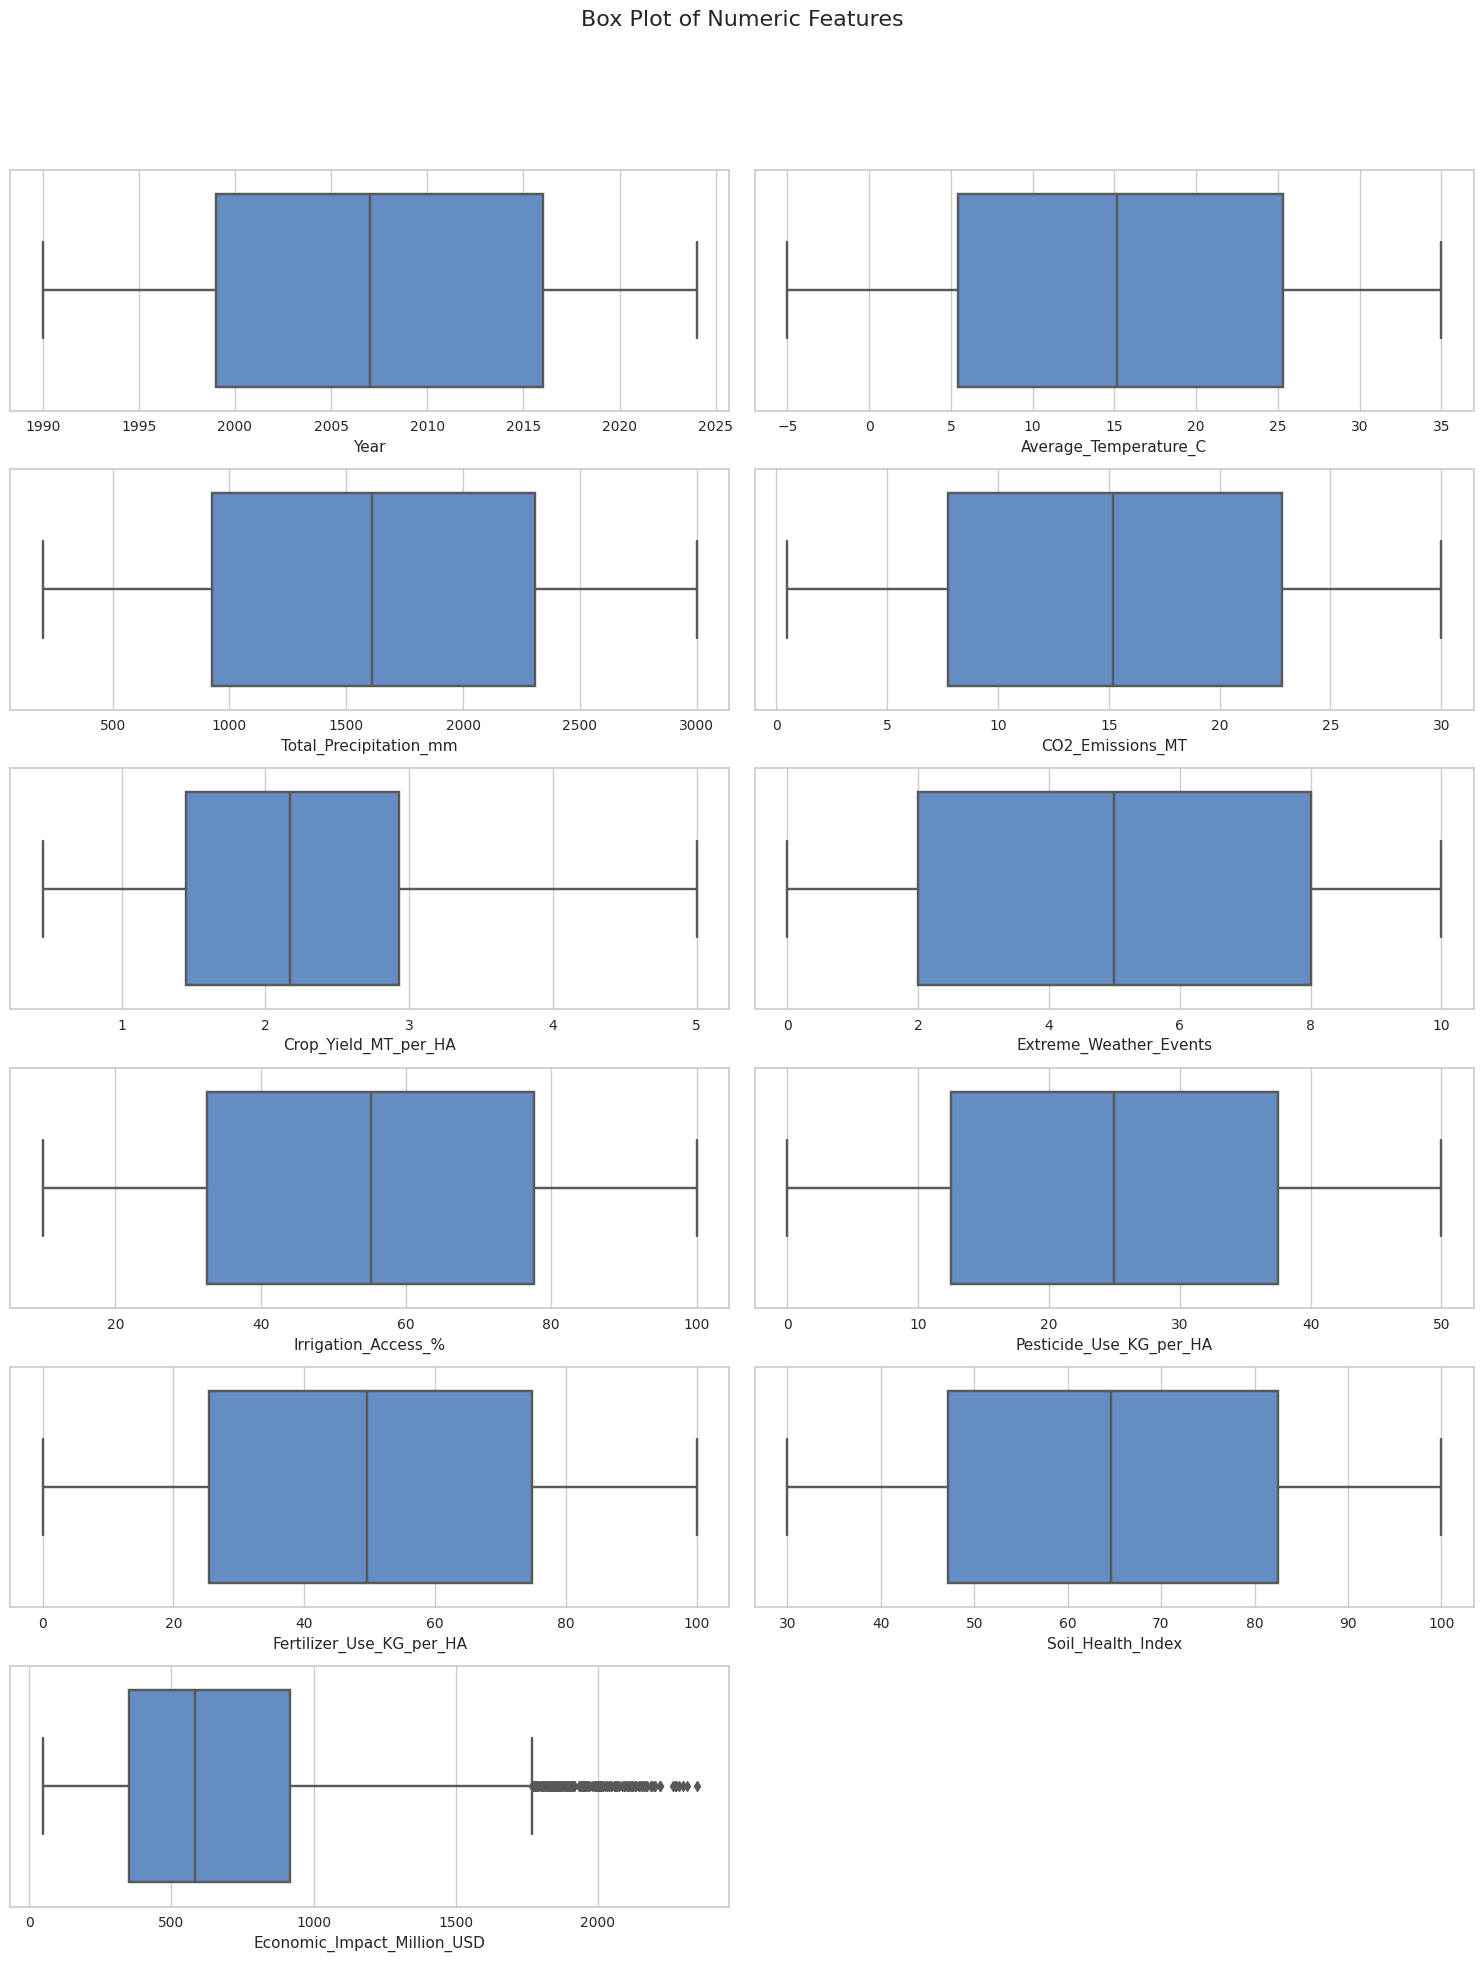

In [633]:
# Detection of outliers
n_rows = 6
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
fig.suptitle('Box Plot of Numeric Features', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(numeric_columns):
    sns.boxplot(x=df[feature], ax=axes[i])

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

There are outliers in the 'Economic_Impact_Million_USD' column.



# Feature Extraction

In [634]:
winter_crops = ['Wheat','Cotton', 'Barley', 'Fruits']
summer_crops = ['Corn', 'Rice', 'Sugarcane', 'Vegetables', 'Coffee','Soybeans']

def classify_crop(crop):
    if crop in winter_crops:
        return 'Winter'
    elif crop in summer_crops:
        return 'Summer'
    return 'Other'

df['Crop_Classification'] = df['Crop_Type'].apply(classify_crop)

In [635]:
# 2. Fertilizer_Use_KG_per_HA classification
df['Fertilizer_Classification'] = pd.cut(df['Fertilizer_Use_KG_per_HA'],
                                          bins=[0, 25, 49, 74, 99],
                                          labels=['0-25', '26-49', '50-74', '75-99'])

In [636]:
# 3. Pesticide_Use_KG_per_HA classification
df['Pesticide_Classification'] = pd.cut(df['Pesticide_Use_KG_per_HA'],
                                         bins=[0, 12, 24, 37, 49],
                                         labels=['0-12', '13-24', '25-37', '38-49'])

In [637]:
# 4. Irrigation_Access_% classification
df['Irrigation_Access_Classification'] = pd.cut(df['Irrigation_Access_%'],
                                                 bins=[10, 32, 55, 77, 100],
                                                 labels=['10-32', '33-55', '56-77', '78-100'])

In [638]:
# 5. Average_Temperature_C classification ,
df['Temp_Classification'] = pd.qcut(df['Average_Temperature_C'],
                                      q=[0, 0.25, 0.5, 0.75, 1],
                                      labels=['Very Low', 'Low', 'Moderate', 'High'])


In [639]:
# 6. Total_Precipitation_mm classification
df['Precip_Classification'] = pd.qcut(df['Total_Precipitation_mm'],
                                      q=[0, 0.25, 0.75, 1],
                                      labels=['Low', 'Moderate', 'High'])

In [640]:
# Display the first few rows with the new classifications
df[['Crop_Type', 'Crop_Classification',
    'Fertilizer_Use_KG_per_HA', 'Fertilizer_Classification',
    'Pesticide_Use_KG_per_HA', 'Pesticide_Classification',
    'Irrigation_Access_%', 'Irrigation_Access_Classification',
    'Average_Temperature_C', 'Temp_Classification',
    'Total_Precipitation_mm', 'Precip_Classification']].head()

,Crop_Type,Crop_Classification,Fertilizer_Use_KG_per_HA,Fertilizer_Classification,Pesticide_Use_KG_per_HA,Pesticide_Classification,Irrigation_Access_%,Irrigation_Access_Classification,Average_Temperature_C,Temp_Classification,Total_Precipitation_mm,Precip_Classification
0,Corn,Summer,14.78,0-25,10.08,0-12,14.54,10-32,1.55,Very Low,447.06,Low
1,Corn,Summer,23.25,0-25,33.06,25-37,11.05,10-32,3.23,Very Low,2913.57,High
2,Wheat,Winter,65.53,50-74,27.41,25-37,84.42,78-100,21.11,Moderate,1301.74,Moderate
3,Coffee,Summer,87.58,75-99,14.38,13-24,94.06,78-100,27.85,High,1154.36,Moderate
4,Sugarcane,Summer,88.08,75-99,44.35,38-49,95.75,78-100,2.19,Very Low,1627.48,Moderate


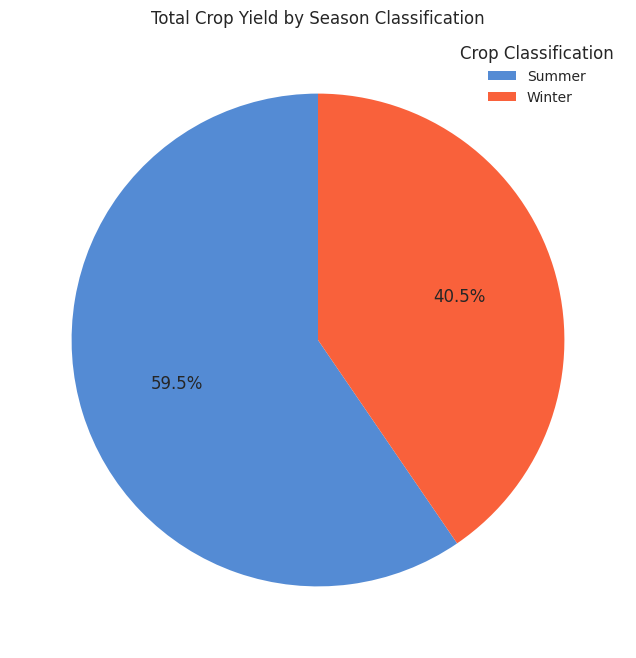

In [641]:
# Plot 1: crop yield Classification Pie Chart
crop_yield_sums = df.groupby('Crop_Classification')['Crop_Yield_MT_per_HA'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(crop_yield_sums, autopct='%1.1f%%', startangle=90)
plt.title('Total Crop Yield by Season Classification')
plt.legend(crop_yield_sums.index, title='Crop Classification')
plt.show()


/tmp/ipykernel_24/302688244.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fertilizer_yield_sums = df.groupby('Fertilizer_Classification')['Crop_Yield_MT_per_HA'].sum().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


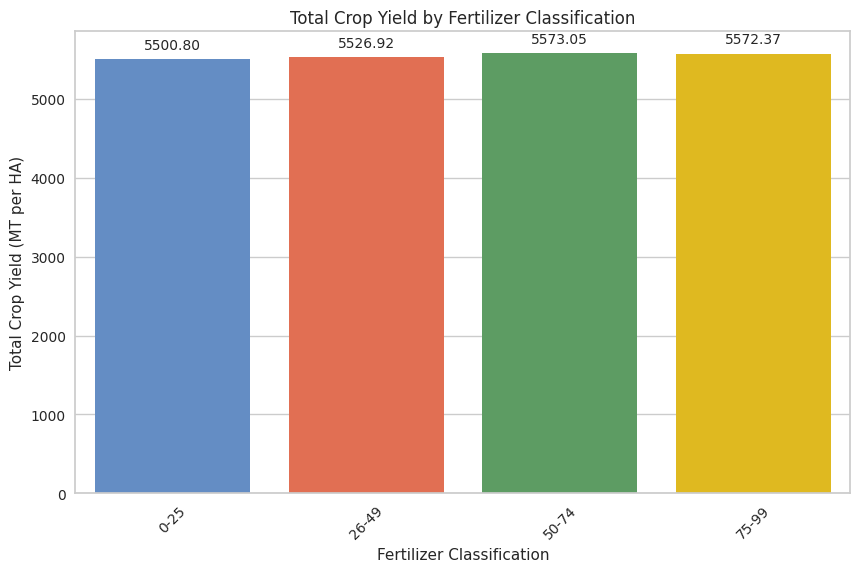

In [642]:
# Plot 2: Fertilizer Classification Bar Plot
fertilizer_yield_sums = df.groupby('Fertilizer_Classification')['Crop_Yield_MT_per_HA'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Fertilizer_Classification', y='Crop_Yield_MT_per_HA', data=fertilizer_yield_sums)

# Add yield values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Total Crop Yield by Fertilizer Classification')
plt.xlabel('Fertilizer Classification')
plt.ylabel('Total Crop Yield (MT per HA)')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_24/1500615345.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pesticide_yield_sums = df.groupby('Pesticide_Classification')['Crop_Yield_MT_per_HA'].sum().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


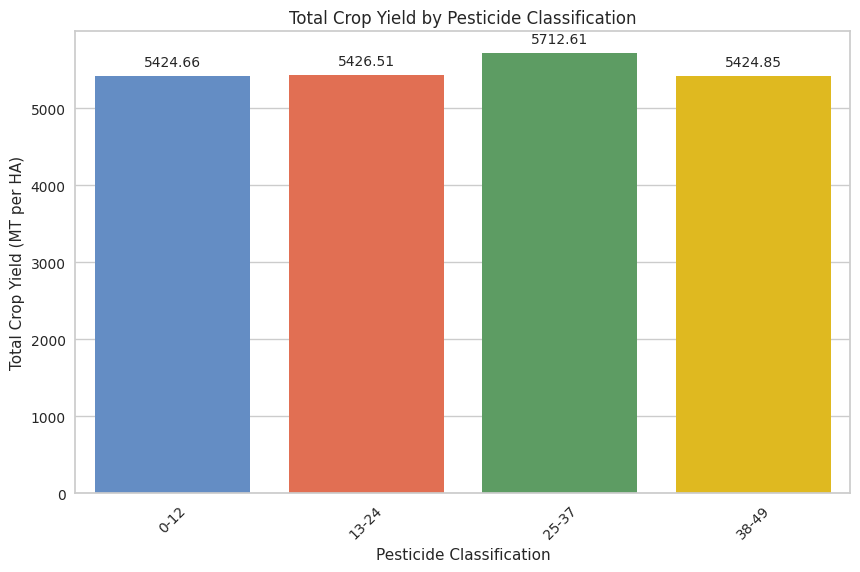

In [643]:
# Plot 3: Pesticide Classification Bar Plot
pesticide_yield_sums = df.groupby('Pesticide_Classification')['Crop_Yield_MT_per_HA'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Pesticide_Classification', y='Crop_Yield_MT_per_HA', data=pesticide_yield_sums)

# Add yield values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Total Crop Yield by Pesticide Classification')
plt.xlabel('Pesticide Classification')
plt.ylabel('Total Crop Yield (MT per HA)')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_24/3557582506.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  irrigation_yield_sums = df.groupby('Irrigation_Access_Classification')['Crop_Yield_MT_per_HA'].sum()


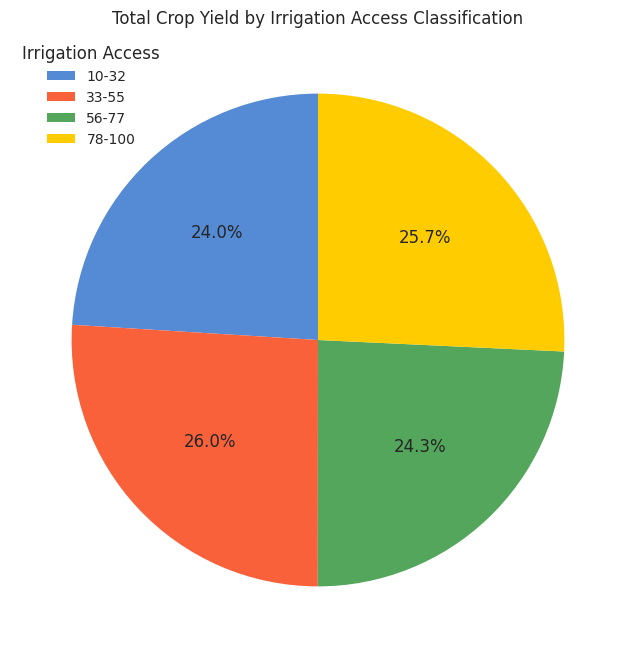

In [644]:
# Plot 4: Irrigation Access Classification Pie Chart
irrigation_yield_sums = df.groupby('Irrigation_Access_Classification')['Crop_Yield_MT_per_HA'].sum()

plt.figure(figsize=(8, 8))
plt.pie(irrigation_yield_sums, autopct='%1.1f%%', startangle=90)
plt.title('Total Crop Yield by Irrigation Access Classification')
plt.legend(irrigation_yield_sums.index, title='Irrigation Access')
plt.show()


/tmp/ipykernel_24/1279648584.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_yield_sums = df.groupby('Temp_Classification')['Crop_Yield_MT_per_HA'].sum().sort_values()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


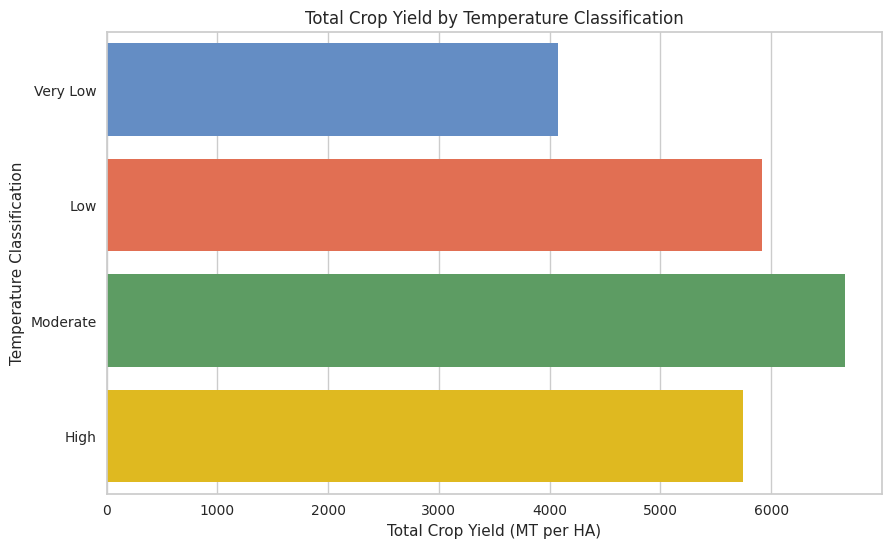

In [645]:
# Plot 5: Temperature Classification Horizontal Bar Plot
temp_yield_sums = df.groupby('Temp_Classification')['Crop_Yield_MT_per_HA'].sum().sort_values()

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=temp_yield_sums.index, x=temp_yield_sums.values)

plt.title('Total Crop Yield by Temperature Classification')
plt.xlabel('Total Crop Yield (MT per HA)')
plt.ylabel('Temperature Classification')
plt.show()


/tmp/ipykernel_24/2520569110.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precip_yield_sums = df.groupby('Precip_Classification')['Crop_Yield_MT_per_HA'].sum().sort_values()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


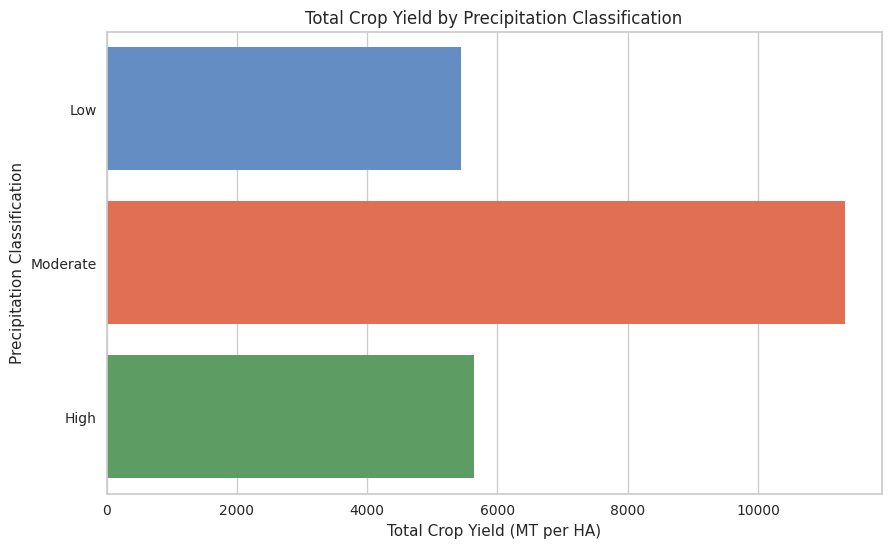

In [646]:
# Plot 6: Precipitation Classification Horizontal Bar Plot
precip_yield_sums = df.groupby('Precip_Classification')['Crop_Yield_MT_per_HA'].sum().sort_values()

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=precip_yield_sums.index, x=precip_yield_sums.values)

plt.title('Total Crop Yield by Precipitation Classification')
plt.xlabel('Total Crop Yield (MT per HA)')
plt.ylabel('Precipitation Classification')
plt.show()


crop types  has a great crop yield at moderate Precipitation , so crops are  sensitive to floods and heavy rains or drought.

# Data distribution visualization for numeric columns


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


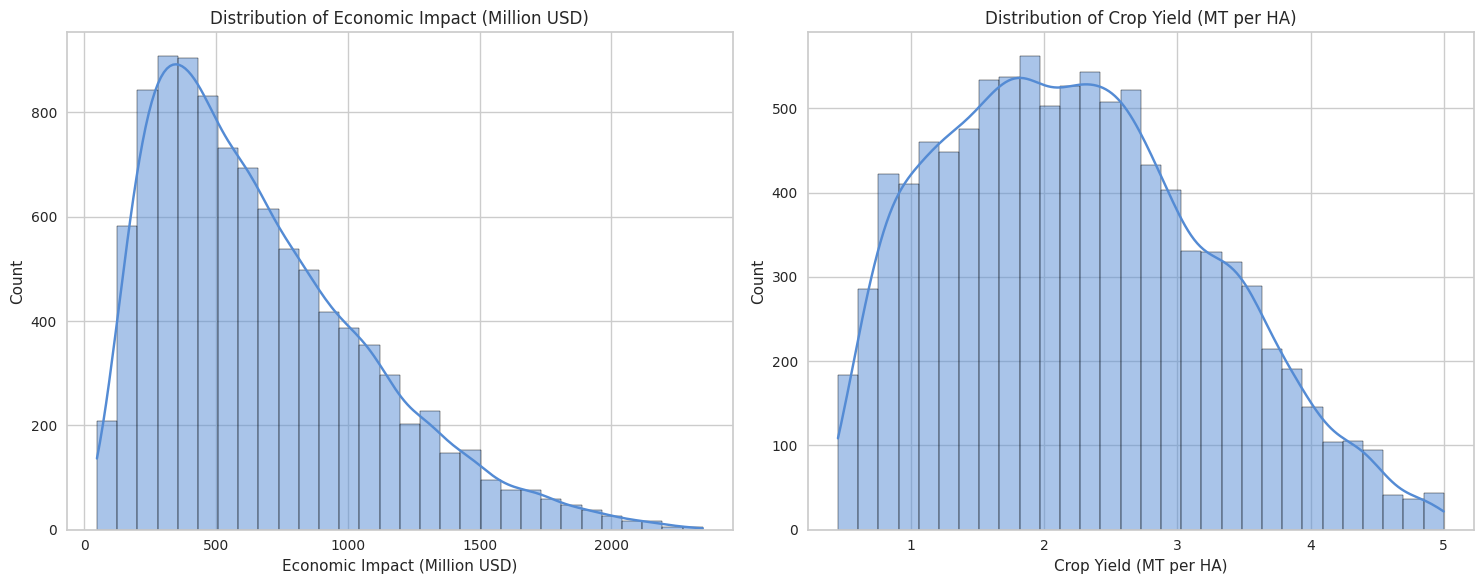

In [647]:
plt.figure(figsize=(15, 6))

# Plot for Economic Impact
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.histplot(df['Economic_Impact_Million_USD'], kde=True, bins=30)
plt.title('Distribution of Economic Impact (Million USD)')
plt.xlabel('Economic Impact (Million USD)')

# Plot for Crop Yield
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(df['Crop_Yield_MT_per_HA'], kde=True, bins=30)
plt.title('Distribution of Crop Yield (MT per HA)')
plt.xlabel('Crop Yield (MT per HA)')

plt.tight_layout()
plt.show()


# The correlation between numeric columns

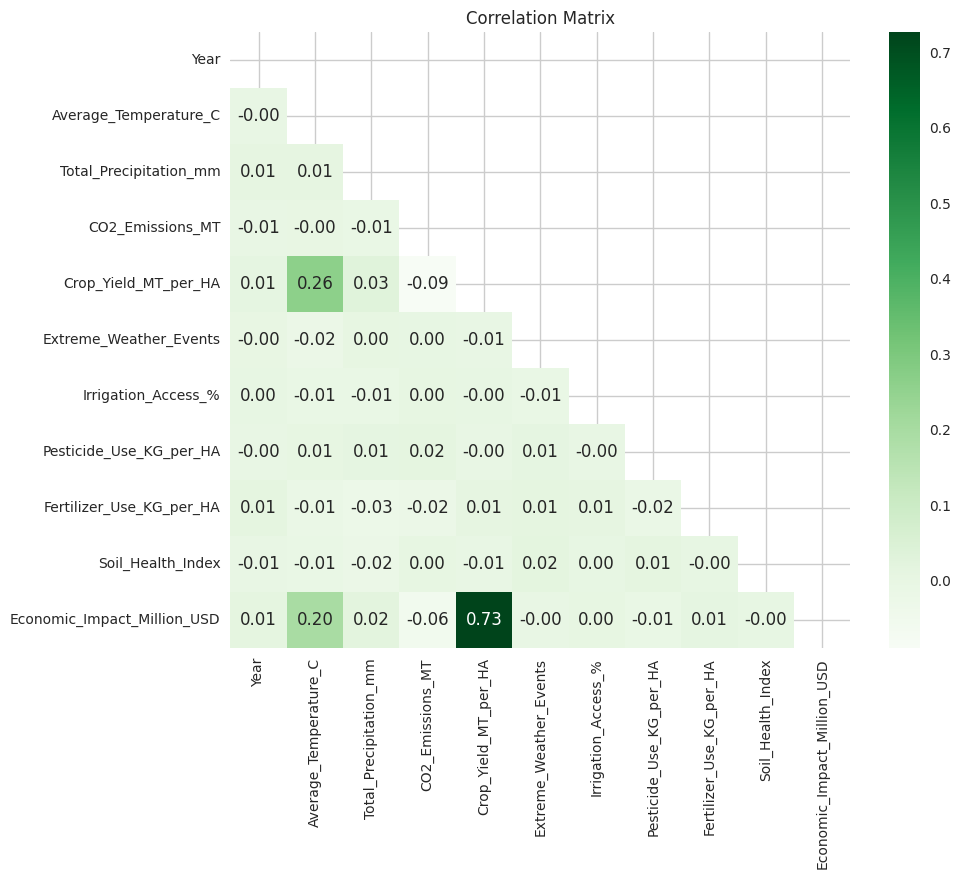

In [648]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f',cmap='Greens', mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix')
plt.show()

Detected column 'Crop_Yield_MT_per_HA' with 'Economic_Impact_Million_USD' has the highest correlation value



# Data Preprocesing


In [649]:
# Remove outliers using IQR
Q1 = df['Economic_Impact_Million_USD'].quantile(0.25)
Q3 = df['Economic_Impact_Million_USD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Economic_Impact_Million_USD'] < lower_bound) | (df['Economic_Impact_Million_USD'] > upper_bound)]

df = df.drop(outliers.index)

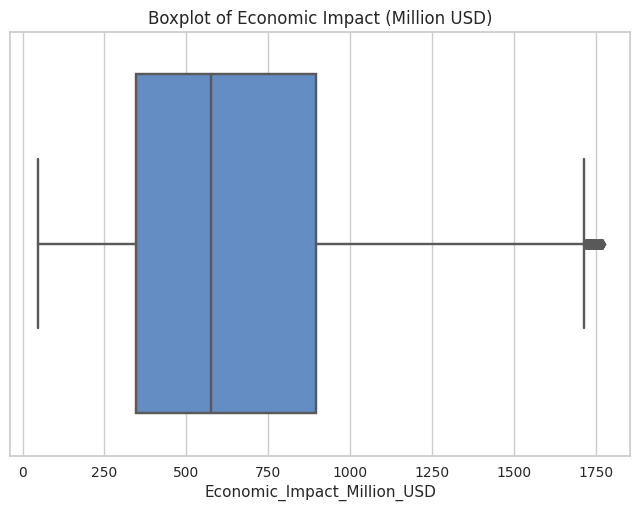

In [650]:
# Boxplot with a custom color
sns.boxplot(x=df['Economic_Impact_Million_USD'])

plt.title('Boxplot of Economic Impact (Million USD)')

plt.show()

In [651]:
# Standardize text columns
for col in categorical_columns:
    df[col] = df[col].str.lower().str.strip()

# Data transformation

In [652]:
clus_df = df.copy()

In [653]:
label_encoder = LabelEncoder()

for col in categorical_columns:
    clus_df[col] = label_encoder.fit_transform(clus_df[col])

clus_df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Crop_Classification,Fertilizer_Classification,Pesticide_Classification,Irrigation_Access_Classification,Temp_Classification,Precip_Classification
0,2001,6,32,2,1.55,447.06,15.22,1.737,8,14.54,...,14.78,83.25,4,808.13,Summer,0-25,0-12,10-32,Very Low,Low
1,2024,4,8,2,3.23,2913.57,29.82,1.737,8,11.05,...,23.25,54.02,0,616.22,Summer,0-25,25-37,10-32,Very Low,High
2,2001,5,4,9,21.11,1301.74,25.75,1.719,5,84.42,...,65.53,67.78,4,796.96,Winter,50-74,25-37,78-100,Moderate,Moderate
3,2001,3,18,1,27.85,1154.36,13.91,3.890,5,94.06,...,87.58,91.39,2,790.32,Summer,75-99,13-24,78-100,High,Moderate
4,1998,6,28,7,2.19,1627.48,11.81,1.080,9,95.75,...,88.08,49.61,0,401.72,Summer,75-99,38-49,78-100,Very Low,Moderate


# Data standardization

In [654]:
scaler = StandardScaler()

numeric_features = clus_df.select_dtypes(include=['number']).columns
clus_df[numeric_features] = scaler.fit_transform(clus_df[numeric_features])

clus_df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Crop_Classification,Fertilizer_Classification,Pesticide_Classification,Irrigation_Access_Classification,Temp_Classification,Precip_Classification
0,-0.600806,0.514449,1.646823,-0.891751,-1.183203,-1.443129,-0.006217,-0.481912,0.953810,-1.565384,...,-1.224563,0.909502,1.401099,0.412638,Summer,0-25,0-12,10-32,Very Low,Low
1,1.679381,-0.181520,-0.836193,-0.891751,-1.037644,1.616976,1.692823,-0.481912,0.953810,-1.699746,...,-0.929682,-0.537710,-1.429046,-0.092033,Summer,0-25,25-37,10-32,Very Low,High
2,-0.600806,0.166465,-1.250029,1.547686,0.511515,-0.382760,1.219186,-0.500495,0.005887,1.124948,...,0.542285,0.143564,1.401099,0.383264,Winter,50-74,25-37,78-100,Moderate,Moderate
3,-0.600806,-0.529505,0.198397,-1.240242,1.095483,-0.565609,-0.158666,1.740775,0.005887,1.496081,...,1.309951,1.312523,-0.013974,0.365802,Summer,75-99,13-24,78-100,High,Moderate
4,-0.898222,0.514449,1.232987,0.850704,-1.127752,0.021373,-0.403048,-1.160177,1.269784,1.561145,...,1.327358,-0.756055,-1.429046,-0.656109,Summer,75-99,38-49,78-100,Very Low,Moderate


# Data Splitting

Selecting data in the 'Crop_Yield_MT_per_HA' and 'Economic_Impact_Million_USD' classes as modeling parameters later on.

In [655]:
X = df.iloc[:, [7, 14]].values

print(pd.DataFrame(X, columns=['Crop_Yield_MT_per_HA','Economic_Impact_Million_USD']))

      Crop_Yield_MT_per_HA  Economic_Impact_Million_USD
0                    1.737                       808.13
1                    1.737                       616.22
2                    1.719                       796.96
3                    3.890                       790.32
4                    1.080                       401.72
...                    ...                          ...
9818                 3.033                      1483.06
9819                 2.560                       829.61
9820                 1.161                       155.99
9821                 3.348                      1613.90
9822                 3.710                       453.14

[9823 rows x 2 columns]


# K-Means

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

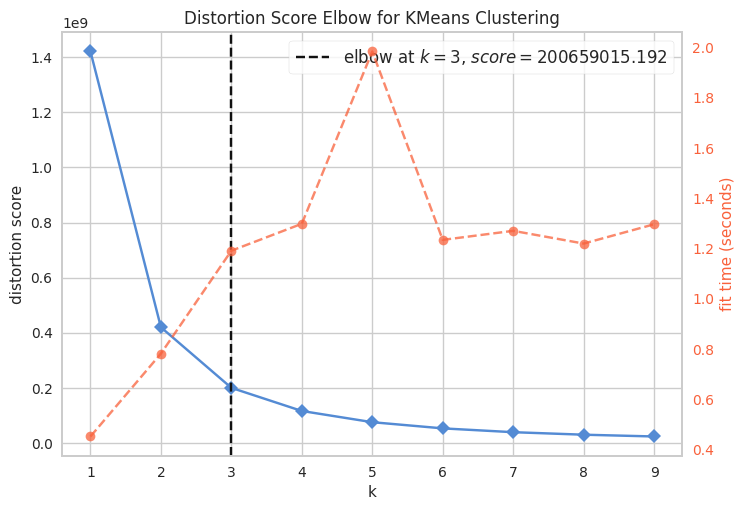

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [656]:
# find the optimal number of clusters
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [657]:
kmeans_model = KMeans(n_clusters=3, random_state=42).fit(X)
kmeans_labels = kmeans_model.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


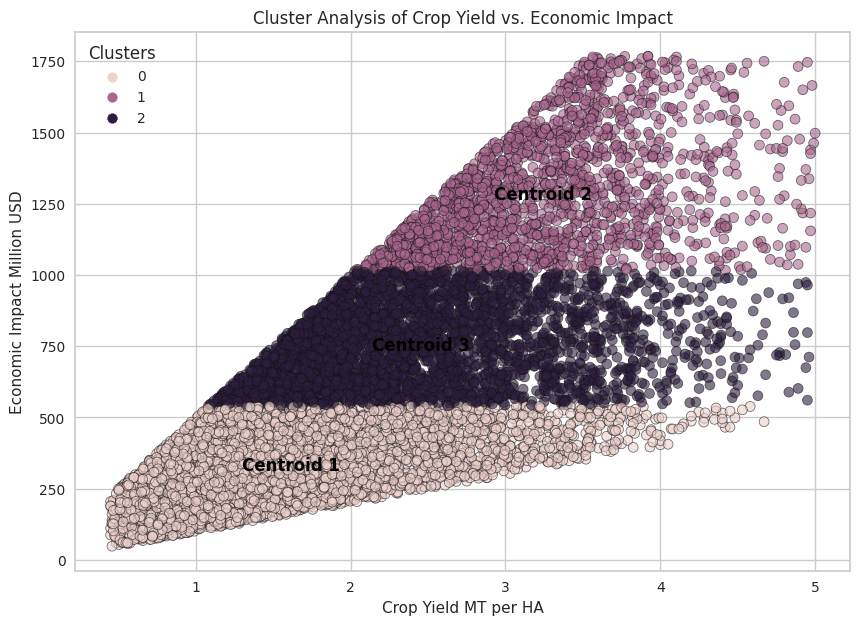

Clusters Characteristics:
Centroid 1: Average Crop Yield MT per HA = 1.61, Average Economic Impact Million USD = 330.23
Centroid 2: Average Crop Yield MT per HA = 3.24, Average Economic Impact Million USD = 1281.80
Centroid 3: Average Crop Yield MT per HA = 2.45, Average Economic Impact Million USD = 751.39


In [658]:
data = pd.DataFrame(X, columns=['Crop Yield MT per HA', 'Economic Impact Million USD'])
data['Cluster'] = kmeans_labels

plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    data=data,
    x='Crop Yield MT per HA',
    y='Economic Impact Million USD',
    hue='Cluster',
    s=50,
    alpha=0.6,
    edgecolor='k'
)

centroids = kmeans_model.cluster_centers_

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='center', va='center', color='black', weight='bold')

plt.xlabel('Crop Yield MT per HA')
plt.ylabel('Economic Impact Million USD')
plt.title('Cluster Analysis of Crop Yield vs. Economic Impact')

plt.legend(title='Clusters')
plt.grid(True)
plt.show()

print("Clusters Characteristics:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Average Crop Yield MT per HA = {centroid[0]:.2f}, Average Economic Impact Million USD = {centroid[1]:.2f}")

The greater the value of crop yields, the greater the economics impact.

In [659]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, kmeans_model.labels_):.3f}")

Silhouette Coefficient: 0.576


The silhouette coefficient measures how similar a point is to points in its own cluster compared to points in other clusters. It ranges from -1 (poor clustering) to 1 (ideal clustering).

In [660]:
y_pred = kmeans_model.predict(X)

result_kmeans = df.copy()
result_kmeans['cluster'] = y_pred
result_kmeans

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Crop_Classification,Fertilizer_Classification,Pesticide_Classification,Irrigation_Access_Classification,Temp_Classification,Precip_Classification,cluster
0,2001,india,west bengal,corn,1.55,447.06,15.22,1.737,8,14.54,...,83.25,water management,808.13,Summer,0-25,0-12,10-32,Very Low,Low,2
1,2024,china,north,corn,3.23,2913.57,29.82,1.737,8,11.05,...,54.02,crop rotation,616.22,Summer,0-25,25-37,10-32,Very Low,High,2
2,2001,france,ile-de-france,wheat,21.11,1301.74,25.75,1.719,5,84.42,...,67.78,water management,796.96,Winter,50-74,25-37,78-100,Moderate,Moderate,2
3,2001,canada,prairies,coffee,27.85,1154.36,13.91,3.890,5,94.06,...,91.39,no adaptation,790.32,Summer,75-99,13-24,78-100,High,Moderate,2
4,1998,india,tamil nadu,sugarcane,2.19,1627.48,11.81,1.080,9,95.75,...,49.61,crop rotation,401.72,Summer,75-99,38-49,78-100,Very Low,Moderate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022,france,nouvelle-aquitaine,cotton,30.48,685.93,17.64,3.033,9,27.56,...,43.41,no adaptation,1483.06,Winter,0-25,38-49,10-32,High,Low,1
9996,1999,australia,queensland,soybeans,9.53,2560.38,10.68,2.560,4,77.02,...,59.39,no adaptation,829.61,Summer,75-99,0-12,78-100,Low,High,2
9997,2000,argentina,patagonia,coffee,31.92,357.76,26.01,1.161,10,78.53,...,41.46,water management,155.99,Summer,26-49,0-12,78-100,High,Low,0
9998,1996,brazil,southeast,soybeans,13.95,1549.52,17.31,3.348,2,42.65,...,75.10,crop rotation,1613.90,Summer,26-49,38-49,33-55,Low,Moderate,1


In [661]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.tolist()
numeric_columns.append('cluster')

mean_result = result_kmeans[numeric_columns].groupby('cluster').mean().T
mean_result

cluster,0,1,2
Year,2007.069357,2007.008380,2007.075116
Average_Temperature_C,13.281117,18.884553,15.856569
Total_Precipitation_mm,1601.844257,1650.634162,1600.470383
CO2_Emissions_MT,15.674622,14.633397,15.072201
Crop_Yield_MT_per_HA,1.613348,3.240931,2.450548
Extreme_Weather_Events,5.028571,4.970391,4.924304
Irrigation_Access_%,55.190410,55.003659,55.314806
Pesticide_Use_KG_per_HA,25.144550,24.811045,24.723999
Fertilizer_Use_KG_per_HA,49.825505,50.634587,49.770667
Soil_Health_Index,65.141117,65.119291,64.409620


# Insights on clusters

* Cluster 1: Has the highest CO2 emissions, extreme weather events, and pesticide use intensity. However, the lowest average temperature and crop yield lead to the lowest economic impact of the other two clusters.
  
* Cluster 2: Despite the highest average temperature, precipitation, and fertilizer use and the lowest CO2 emissions, the cluster has the greatest economic impact. This may be due to several factors, including lower extreme weather events and the highest crop yields.

* Cluster 3 has a higher average temperature than Cluster 1, the lowest extreme weather events, the highest irrigation access, and much greater crop yield than Cluster 1.

In [662]:
clus_0 = result_kmeans[result_kmeans['cluster']==0]
clus_1 = result_kmeans[result_kmeans['cluster']==1]
clus_2 = result_kmeans[result_kmeans['cluster']==2]

In [663]:
def pie_chart(data, column, ax, title):
    data_counts = data[column].value_counts()
    ax.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%')
    ax.set_title(title)


def bar_plt(data, column, ax, title):
    sns.countplot(data=data, x=column, ax=ax,palette=["#548bd4","#f9613b","#53a65b","#ffcc00","#fecfe7","#48909f"])
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Cluster Visualization for 'Country'

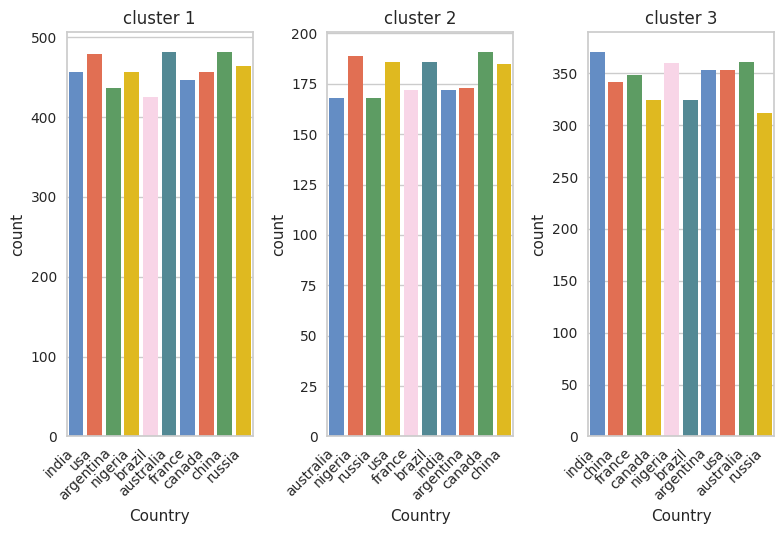

In [664]:
fig, axes = plt.subplots(nrows=1, ncols=3)

bar_plt(clus_0, 'Country', axes[0], 'cluster 1')
bar_plt(clus_1, 'Country', axes[1], 'cluster 2')
bar_plt(clus_2, 'Country', axes[2], 'cluster 3')

plt.tight_layout()
plt.show()

* In cluster 1, 'Country' is mostly in USA, Australia and China.
* Then in cluster 2, 'Country' tends to be mostly in Canada and Nigeria.
* While in cluster 3, 'Country' is mostly in India, Nigeria and Australia.

# Cluster Visualization for 'Crop Type'

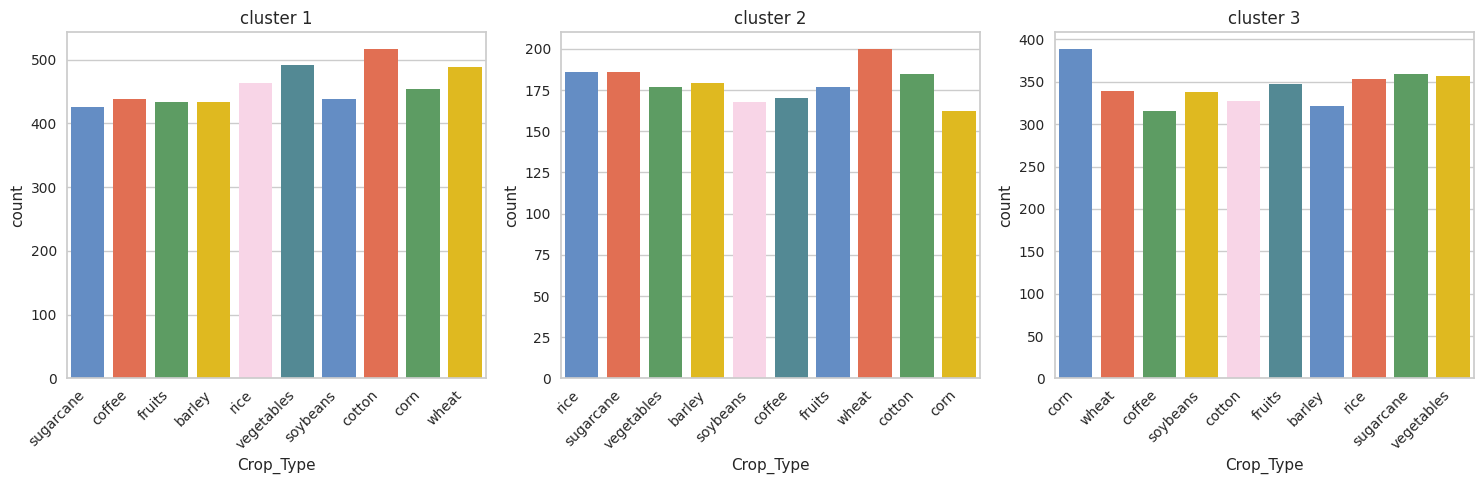

In [665]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
bar_plt(clus_0, 'Crop_Type', axes[0], 'cluster 1')
bar_plt(clus_1, 'Crop_Type', axes[1], 'cluster 2')
bar_plt(clus_2, 'Crop_Type', axes[2], 'cluster 3')

plt.tight_layout()
plt.show()

* Cluster 1, the majority of 'Crop_Type' are cotton, vegetables, and wheat, with a fairly large number of each crop type.
* Then in cluster 2, more crop type is wheat, and then rice, sugarcane, and cotton, with the number of each crop type not as much as in cluster 1.
* While in cluster 3, it tends to be dominated by the crop type corn, with a smaller number than in cluster 1 and larger than in cluster 2.

# Cluster Visualization for 'Adaptation Strategies'

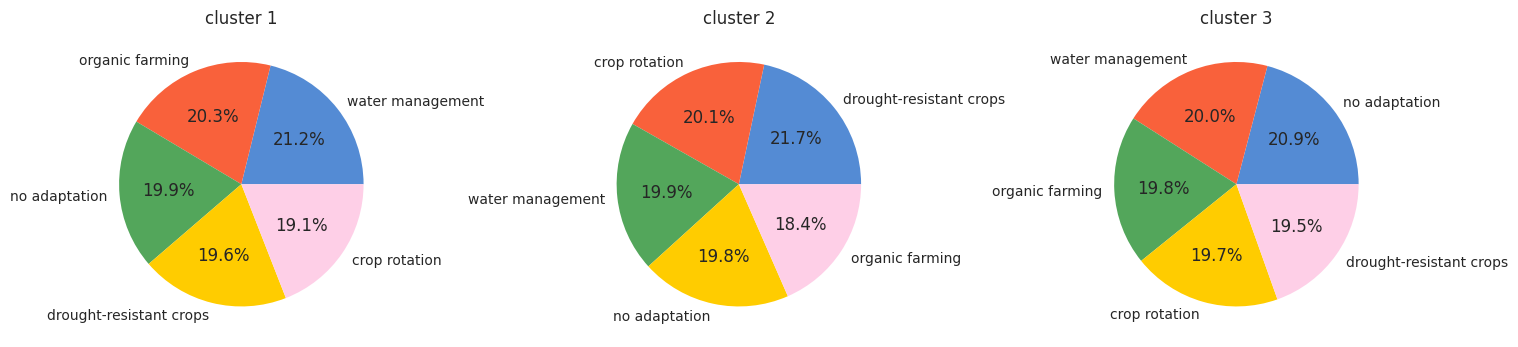

In [666]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
pie_chart(clus_0, 'Adaptation_Strategies', axes[0], 'cluster 1')
pie_chart(clus_1, 'Adaptation_Strategies', axes[1], 'cluster 2')
pie_chart(clus_2, 'Adaptation_Strategies', axes[2], 'cluster 3')

plt.tight_layout()
plt.show()

* Cluster 1, the majority of 'Adaptation_Strategies' or things done are Water Management, and Organic Farming.
* Then in cluster 2, there are Drought-resistant Crops and crop rotation.
* While in cluster 3, more adapted by means of Water Management or using no adaptation.

# Recommendations
* We can use greenhouses that maintain ideal temperature by isolating plants from external weather.
* We can use sensors that monitor the plant's needs for fertilizer, pesticides, and water level.